**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Claire Danaher
    Erin Teeple
    Janvi Kathari
    Jonny Friedmann
    Renee Sweeny
  

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [74]:
import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)


In [75]:
"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics



# NOTE: we put the following in a 'if __name__ == "__main__"' protected
# block to be able to use a multi-core grid search that also works under
# Windows, see: http://docs.python.org/library/multiprocessing.html#windows
# The multiprocessing module is used as the backend of joblib.Parallel
# that is used when n_jobs != 1 in GridSearchCV

# the training data folder must be passed as first argument
movie_reviews_data_folder = sys.argv[1]
dataset = load_files('txt_sentoken', shuffle=False)
print("n_samples: %d" % len(dataset.data))

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)


# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# import matplotlib.pyplot as plt
# plt.matshow(cm)
# plt.show()

n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.01
             precision    recall  f1-score   support

        neg       0.87      0.83      0.85       254
        pos       0.84      0.87      0.85       246

avg / total       0.85      0.85      0.85       500

[[212  42]
 [ 33 213]]


In [ ]:
"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


# NOTE: we put the following in a 'if __name__ == "__main__"' protected
# block to be able to use a multi-core grid search that also works under
# Windows, see: http://docs.python.org/library/multiprocessing.html#windows
# The multiprocessing module is used as the backend of joblib.Parallel
# that is used when n_jobs != 1 in GridSearchCV

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)



# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    #'vect__ngram_range': [(1,1),(1, 2),(2,2)],  #we determined bi-grams work better above so only running with bigram

    #'vect__max_features':range(1,100,5), 
    #'vect__max_features':[590],
    
    #LARGE SET
    #'vect__min_df':range(1,30),
    #'vect__max_df':np.arange(0.85,0.9,0.005),
    
    #SMALL SET
    'vect__min_df':[1,2,3,4,5,6,10,15,20],
    'vect__max_df':[.85,.88,.90,.92,.94,.96],
    
    

    #Optimal Values#
    'vect__ngram_range': [(1, 2)],
    #'vect__max_df': [0.95],
    #'vect__min_df':[3],
    
}


# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(parameters)),
    ('clf', LinearSVC(C=1000)),
])

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=5)
grid_search.fit(docs_train, y_train)
        
# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)


print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

        

# import matplotlib.pyplot as plt
# plt.matshow(cm)
# plt.show()}

In [66]:
print(grid_search.best_params_)


{'vect__max_df': 0.88, 'vect__min_df': 6, 'vect__ngram_range': (1, 2)}


In [ ]:
param_s=[]
score=[]
max_df=[]
min_df=[]
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    param_s.append(grid_search.cv_results_['params'][i])
    score.append(grid_search.cv_results_['mean_test_score'][i])

for i in param_s:
    x=str(i)
    z=x.find(',')
    max_df.append(float(x[17:x.find(',')]))
    x=x[(z+1):]
    min_df.append(float(x[17:x.find(',')]))


In [59]:
large_min_df=min_df
large_max_df=max_df
large_score=score

<IPython.core.display.Javascript object>


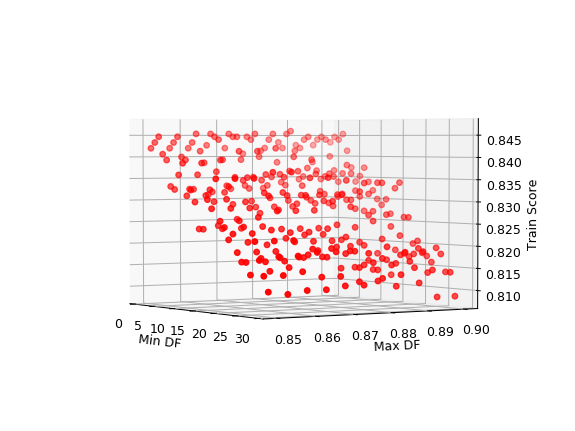

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =large_min_df
y =large_max_df
z =large_score



ax.scatter(x, y, z, c='r', marker='o')


ax.set_xlabel('Min DF')
ax.set_ylabel('Max DF')
ax.set_zlabel('Train Score')

plt.show()

In [48]:
print(grid_search.best_params_)

        
# Print and plot the confusion matrix
print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

#cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
    

{'vect__max_df': 0.84, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}
             precision    recall  f1-score   support

        neg       0.85      0.86      0.86       244
        pos       0.87      0.86      0.86       256

avg / total       0.86      0.86      0.86       500

[[211  33]
 [ 37 219]]


*------------------------

## Problem 3 (20 points): Machine learning algorithms


In [79]:
"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

    
# prepares the model and support to the model (which is what the Tfidf vectorizer does)
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LinearSVC())
])

# sets the paramters to be used in the models that we set-up in the pipeline. Here you can either use a single value
# (like you can see we did with vect__min_df) or you can give it multiple values (like you can see in clf__C)
# if you set the paramters to multiple values, then when the models are fed into the GridSearch later on, it will check through
# all of those options *for you*. In this block, I am trying out different values of 'C' which is the tuning paramter for
# LinearSVC
parameters = {
    'vect__ngram_range': [(1, 2)], 
    'vect__min_df':[4],
    'vect__max_df': [0.885],
    'clf__C': range(100,1500,100)
}

# these 2 lines are where all the magic happens. GridSearchCV is where it takes all the prepared models from Pipeline,
# and tries them out with all the paramter option you provided in Parameters. After it checks everything, it picks the "best"
# set of paramter options. grid_search.fit() will then use those paramters and do the classifying on the testing data. 
# So GridSearchCV finds the best options, fit() does the actual classifying that we read as an output result
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)


# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

print(grid_search.best_params_)
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)


{'clf__C': 100, 'vect__max_df': 0.885, 'vect__min_df': 4, 'vect__ngram_range': (1, 2)}
             precision    recall  f1-score   support

        neg       0.86      0.90      0.88       239
        pos       0.90      0.87      0.88       261

avg / total       0.88      0.88      0.88       500

[[215  24]
 [ 35 226]]


In [68]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])

# for the K-nearest neighbors model, I am trying out different numbers of neighbors for the model to use in classifying
parameters = {
    'vect__ngram_range': [(1, 2)], 
    'vect__min_df':[4],
    'vect__max_df': [0.885],
    'clf__n_neighbors': range(1,51,5)
}


grid_search2 = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search2.fit(docs_train, y_train)


# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search2.predict(docs_test)

print(grid_search2.best_params_)
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

{'clf__n_neighbors': 36, 'vect__max_df': 0.885, 'vect__min_df': 4, 'vect__ngram_range': (1, 2)}
             precision    recall  f1-score   support

        neg       0.82      0.56      0.67       262
        pos       0.64      0.87      0.74       238

avg / total       0.74      0.71      0.70       500

[[147 115]
 [ 32 206]]


*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.lda import LDA
from sklearn import manifold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

train = TfidfVectorizer(docs_train, ngram_range = (1,2), min_df = 3, max_df = 0.95, 
                        max_features = 200, stop_words = 'english')
Xtrain = train.fit_transform(docs_train).toarray()

test = TfidfVectorizer(docs_test, ngram_range = (1,2), min_df = 3, max_df = 0.95, 
                       max_features = 200, stop_words = 'english')
Xtest = test.fit_transform(docs_test).toarray()

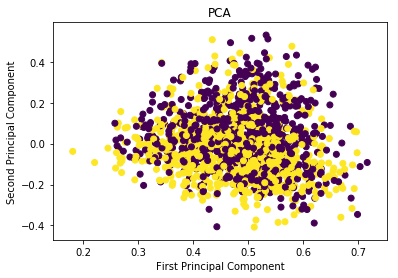

In [25]:
pca = TruncatedSVD(n_components=2).fit_transform(Xtrain)

plt.scatter(pca[:, 0], pca[:, 1], c = y_train)
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

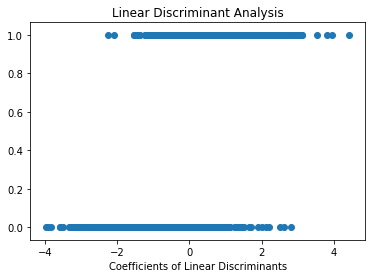

In [26]:
lda = LDA().fit(Xtrain, y_train).transform(Xtrain)

plt.scatter(lda, y_train)
plt.title("Linear Discriminant Analysis")
plt.xlabel("Coefficients of Linear Discriminants")
plt.show()

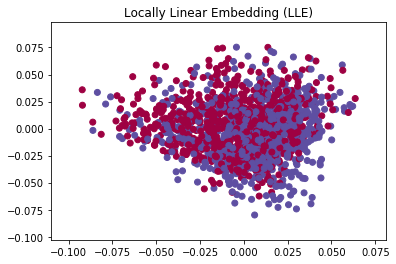

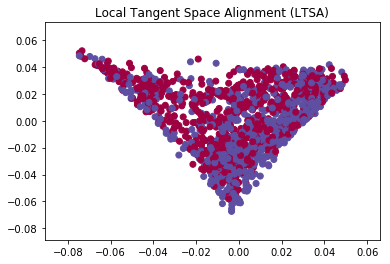

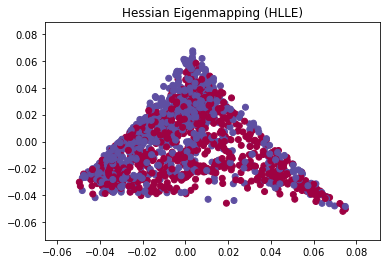

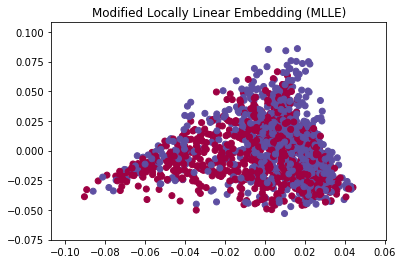

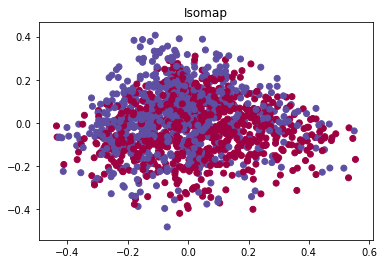

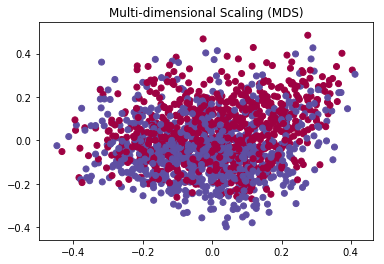

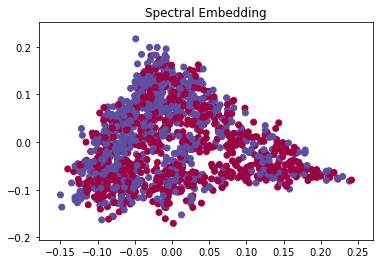

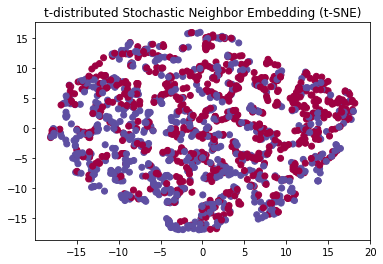

In [27]:
pca = TruncatedSVD(n_components=3).fit_transform(Xtrain)

n_neighbors = 10
n_components = 2

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['Locally Linear Embedding (LLE)', 'Local Tangent Space Alignment (LTSA)', 
          'Hessian Eigenmapping (HLLE)', 'Modified Locally Linear Embedding (MLLE)']

for i, method in enumerate(methods):
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver = 'auto', 
                                        method = method).fit_transform(pca)
    plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
    plt.title(labels[i])
    plt.show()
    
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(pca)
plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
plt.title("Isomap")
plt.show()

mds = manifold.MDS(n_components, max_iter = 100, n_init = 1)
Y = mds.fit_transform(pca)
plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
plt.title("Multi-dimensional Scaling (MDS)")
plt.show()

se = manifold.SpectralEmbedding(n_components = n_components, n_neighbors = n_neighbors)
Y = se.fit_transform(pca)
plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
plt.title("Spectral Embedding")
plt.show()

tsne = manifold.TSNE(n_components = n_components, init = 'pca', random_state = 0)
Y = tsne.fit_transform(pca)
plt.scatter(Y[:, 0], Y[:, 1], c = y_train, cmap = plt.cm.Spectral)
plt.title("t-distributed Stochastic Neighbor Embedding (t-SNE)")
plt.show()

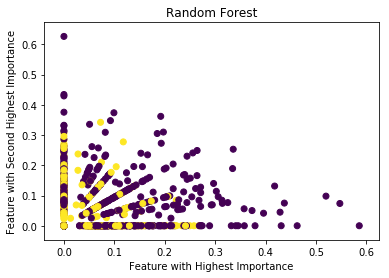

In [44]:
forest = RandomForestClassifier(n_estimators = 100).fit(Xtrain, y_train)
importance = forest.feature_importances_
second, first = sorted(range(len(importance)), key = lambda i: importance[i])[-2:]

plt.scatter(Xtrain[:, first], Xtrain[:, second], c = y_train)
plt.title("Random Forest")
plt.xlabel("Feature with Highest Importance")
plt.ylabel("Feature with Second Highest Importance")
plt.show()

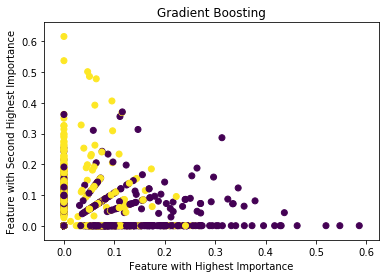

In [57]:
grad_boost = GradientBoostingClassifier(n_estimators = 500).fit(Xtrain, y_train)
importance = grad_boost.feature_importances_
second, first = sorted(range(len(importance)), key = lambda i: importance[i])[-2:]

plt.scatter(Xtrain[:, first], Xtrain[:, second], c = y_train)
plt.title("Gradient Boosting")
plt.xlabel("Feature with Highest Importance")
plt.ylabel("Feature with Second Highest Importance")
plt.show()

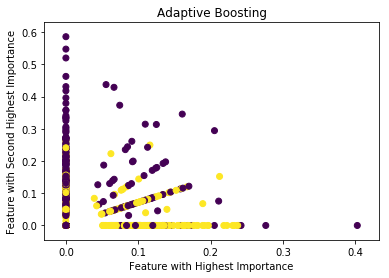

In [58]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.5).fit(Xtrain, y_train)
importance = ada_boost.feature_importances_
second, first = sorted(range(len(importance)), key = lambda i: importance[i])[-2:]

plt.scatter(Xtrain[:, first], Xtrain[:, second], c = y_train)
plt.title("Adaptive Boosting")
plt.xlabel("Feature with Highest Importance")
plt.ylabel("Feature with Second Highest Importance")
plt.show()